<a href="https://colab.research.google.com/github/francji1/01NAEX/blob/main/code/01NAEX_Exercise_01_solution_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01NAEX - Exercise 01 (solution by A. Gaj)
Data and exercises come from D.C. Montgomery: Design and Analysis of Experiment


## Setup

In [ ]:
#!pip install rpy2
#%load_ext rpy2.ipython

In [ ]:
import numpy as np
import scipy as scp
import sympy as sp
import torch as tc
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from scipy.stats import norm, t

## Assigment:

* Run and familiarize with Python.
* Solve problems 2.20, 2.26, 2.30 from following slides.
  (originally from Montgomery - Design and Analysis of Experiments).


### Exercise 2.20

The shelf life of a carbonated beverage is of interest. Ten bottles are randomly
selected and tested, and the following results are obtained:

| Days ||
|--------------------------------------------||
| 108      |  138  |
| 124      |  163  |
| 124      |  159  |
| 106      |  134  |
| 115      |  139  |

* We would like to demonstrate that the mean shelf life exceeds 120 days.
Set up appropriate hypotheses for investigating this claim.
* Test these hypotheses using significant level $\alpha = 0.01$. Find the P-value
for the test. What are your conclusions?
* Construct a 99 percent confidence interval on the mean shelf life.

In [ ]:
# Read the data from the URL
url_20 = "https://raw.githubusercontent.com/francji1/01NAEX/main/data/Ex02_20.csv"
df20 = pd.read_csv(url_20, sep=";")

# Display the first few rows of the dataframe
df20.head()

,Days
0,108
1,124
2,124
3,106
4,115


SOLUTION:

In [ ]:
df20.describe()

,Days
count,10.00000
mean,131.00000
std,19.54482
min,106.00000
25%,117.25000
50%,129.00000
75%,138.75000
max,163.00000


#### Visualisation

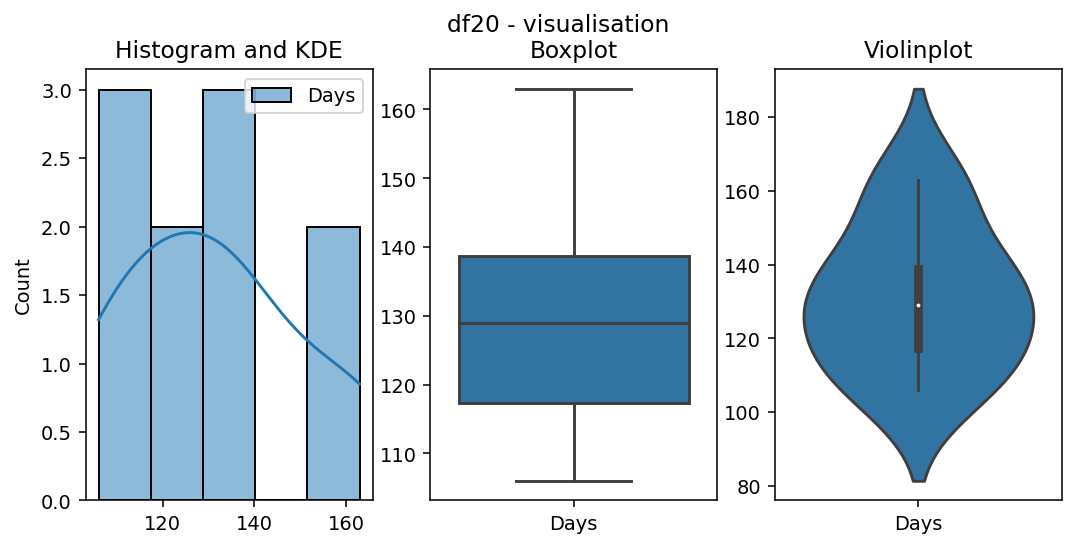

In [ ]:
# standart plotting routine:
plt.figure(figsize=(9, 4), dpi=140)
plt.subplot(131)
sbn.histplot(data=df20, kde=True)
plt.title('Histogram and KDE')

plt.subplot(132)
sbn.boxplot(data=df20)
plt.title('Boxplot')

plt.subplot(133)
sbn.violinplot(data=df20)
plt.title('Violinplot')

plt.suptitle('df20 - visualisation')

plt.savefig('df20.png', dpi=400)
plt.show()

#### Mean exceeds 120 days?

We shall use **one sample t-test** [from SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)

In [ ]:
# formulate H_0
print(f'H_0: the mean shelf life (X) exceeds X_0 = 120 (days), \n     i.e H_0: EX>120 \n\n')

# Perform a one-sample t-test
t_statistic, p_value = scp.stats.ttest_1samp(df20, popmean=120, alternative='less')
    # ‘less’: the mean of the underlying distribution of the sample is less than the given population mean (popmean)

alpha = 0.01  # significance level
if p_value < alpha:
    # we dont have enough evidence to accept H_0
    print("Reject H_0 (Have to accept H_1). The mean is less than 120 days.")
else:
    # significant evidence to reject H_0, i.e. to accept H_1
    print("Can't reject H_0 (Have to accept H_0). The mean exceeds 120 days.")

H_0: the mean shelf life (X) exceeds X_0 = 120 (days), 
     i.e H_0: EX>120 


Can't reject H_0 (Have to accept H_0). The mean exceeds 120 days.


In [ ]:
print(f'p_value = {p_value}')

p_value = [0.94559113]


#### Confidence intervals

In [ ]:
# returns confidence interval of mean
def confIntMean(data, conf=0.95):
    mean = np.mean(data)
    sem = scp.stats.sem(data)
    m = scp.stats.t.ppf((1+conf)/2, len(data)-1) # sem() = Standard Error of the Mean
    return mean - m*sem, mean + m*sem

In [ ]:
print( f"confidence interval : {confIntMean(df20['Days'], conf=0.99)}" )

confidence interval : (110.91401815663062, 151.08598184336938)



### Exercise 2.26

The following are the burning times (in minutes) of chemical flares of two different formulations. The design engineers are interested in both the mean and
variance of the burning times.

|Type1|| Type2 ||
|--------------------------------||||
| 65 | 82 | 64 | 56 |
| 81 | 67 | 71 | 69 |
| 57 | 59 | 83 | 74 |
| 66 | 75 | 59 | 82 |
| 82 | 70 | 65 | 79 |


1. Test the hypothesis that the two variances are equal. Use $\alpha = 0.05$.
2. Using the results of part 1), test the hypothesis that the mean burning
times are equal. Use $\alpha = 0.05$. What is the P-value for this test?
3. Discuss the role of the normality assumption in this problem. Check the
assumption of normality for both types of flares

In [ ]:
# Read the data from the URL
url_26 = "https://raw.githubusercontent.com/francji1/01NAEX/main/data/Ex02_26.csv"
df26 = pd.read_csv(url_26, sep=";")

# Display the first few rows of the dataframe
df26.head()

,Type1,Type2
0,65,64
1,81,71
2,57,83
3,66,59
4,82,65


SOLUTION:

In [ ]:
df26.describe()

,Type1,Type2
count,10.000000,10.000000
mean,70.400000,70.200000
std,9.264028,9.366607
min,57.000000,56.000000
25%,65.250000,64.250000
50%,68.500000,70.000000
75%,79.500000,77.750000
max,82.000000,83.000000


#### Visualisation

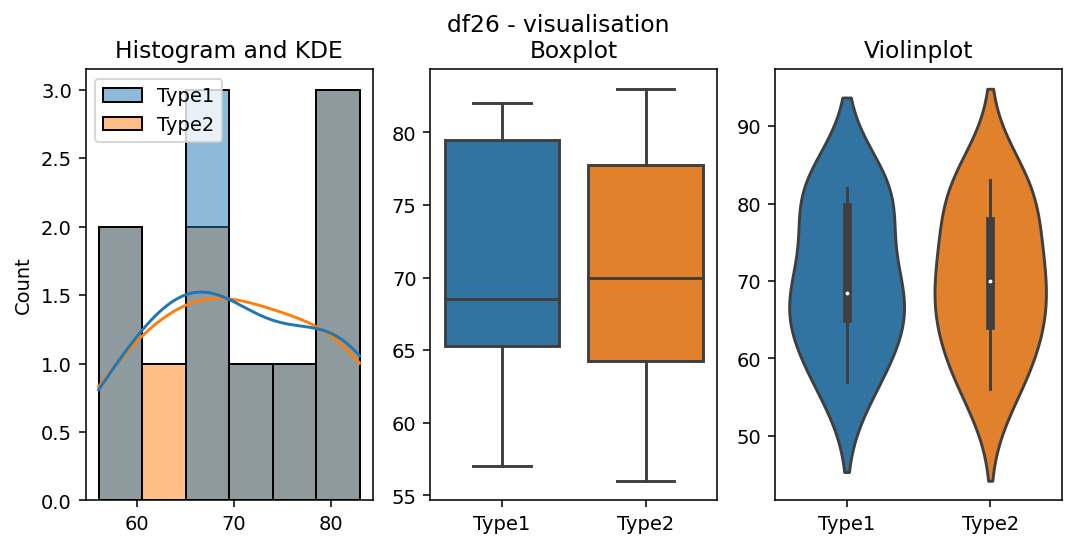

In [ ]:
plt.figure(figsize=(9, 4), dpi=140)
plt.subplot(131)
sbn.histplot(data=df26, kde=True)
plt.title('Histogram and KDE')

plt.subplot(132)
sbn.boxplot(data=df26)
plt.title('Boxplot')

plt.subplot(133)
sbn.violinplot(data=df26)
plt.title('Violinplot')

plt.suptitle('df26 - visualisation')

plt.savefig('df26.png', dpi=400)
plt.show()

#### Variance values are equal?

We shall use **Levene's test** (since prior distributions of data are unknown).
[Levene in SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html#scipy.stats.levene)

In [ ]:
# formulate H_0
print(f'H_0: Var[Type1] = Var[Type2]')

# Perform a Levene test
stat, p_value = scp.stats.levene(df26.Type1, df26.Type2, center='mean')
print(f'p_value = {p_value}')

alpha = 0.05  # significance level
if p_value < alpha:
    # we dont have enough evidence to accept H_0
    print("Reject H_0 (Have to accept H_1). Var[Type1] != Var[Type2]")
else:
    # significant evidence to reject H_0, i.e. to accept H_1
    print("Can't reject H_0 (Have to accept H_0). Var[Type1] = Var[Type2]")

H_0: Var[Type1] = Var[Type2]
p_value = 0.9699429970190344
Can't reject H_0 (Have to accept H_0). Var[Type1] = Var[Type2]


#### Mean values are equal?

In [ ]:
# formulate H_0
print(f'H_0: E[Type1] = E[Type2]')

# Perform a t-test
stat, p_value = scp.stats.ttest_ind(df26.Type1, df26.Type2, equal_var=True, alternative='two-sided')
# result from previous test is used here via "equal_var" parameter
# 'two-sided' emphasises that we test equality (only)
print(f'p_value = {p_value}')

alpha = 0.05  # significance level
if p_value < alpha:
    # we dont have enough evidence to accept H_0
    print("Reject H_0 (Have to accept H_1). E[Type1] != E[Type2]")
else:
    # significant evidence to reject H_0, i.e. to accept H_1
    print("Can't reject H_0 (Have to accept H_0). E[Type1] = E[Type2]")

H_0: E[Type1] = E[Type2]
p_value = 0.9622387844779036
Can't reject H_0 (Have to accept H_0). E[Type1] = E[Type2]


#### Data come from normal distribution?

In [ ]:
# Check normality for Type1 >>

# formulate H_0
print(f'H_0: data come from normal distribution')

# Perform a Shapiro-Wilk
stat, p_value = scp.stats.shapiro(df26.Type1)
print(f'p_value = {p_value}')

alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject H_0 (Have to accept H_1). Data of Type1 doesn't come from normal distribution.")
else:
    print("Can't reject H_0 (Have to accept H_0). Data of Type1 come from normal distribution ✅")

H_0: data come from normal distribution
p_value = 0.3065428137779236
Can't reject H_0 (Have to accept H_0). Data of Type1 come from normal distribution ✅


In [ ]:
# same for Type2
stat, p_value = scp.stats.shapiro(df26.Type2)
print(f'p_value = {p_value}')

alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject H_0 (Have to accept H_1). Data of Type2 doesn't come from normal distribution.")
else:
    print("Can't reject H_0 (Have to accept H_0). Data of Type2 come from normal distribution ✅")

p_value = 0.7251082062721252
Can't reject H_0 (Have to accept H_0). Data of Type2 come from normal distribution ✅


#### Conclusion:
There's almost no difference between those two type of flares (that can be statistically proven).

### Exercise 2.30

Front housings for cell phones are manufactured in an injection molding process. The time the part is allowed to cool in the mold before removal is thought to influence the occurrence of a particularly troublesome cosmetic defect, flow lines, in the finished housing. After manufacturing, the housings are inspected visually and assigned a score between 1 and 10 based on their appearance, with 10 corresponding to a perfect part and 1 corresponding to a completely defective part. An experiment was conducted using two cool-down times, 10 and 20 seconds, and 20 housings were evaluated at each level of cool-down time. All 40 observations in this experiment were run in random order.


| 10s |||| 20s ||||
|--------------------------------||||||||
| 1 | 3 | 2 | 6 | 7 | 6 | 8 | 9 |
| 1 | 5 | 3 | 3 | 5 | 5 | 9 | 7 |
| 5 | 2 | 1 | 1 | 5 | 4 | 8 | 6 |
| 5 | 6 | 2 | 8 | 6 | 8 | 4 | 5 |
| 3 | 2 | 5 | 3 | 6 | 8 | 7 | 7 |


* Is there evidence to support the claim that the longer cool-down time
results in fewer appearance defects? Use $\alpha = 0.05$.
* What is the P-value for the test conducted in the previous part?
* Find a 95 percent confidence interval on the difference in means. Provide
a practical interpretation of this interval.
* Draw dot diagrams to assist in interpreting the results from this
experiment.


In [ ]:
# Read the data from the URL
url_30 = "https://raw.githubusercontent.com/francji1/01NAEX/main/data/Ex02_30.csv"
df30 = pd.read_csv(url_30, sep=";")

# Display the first few rows of the dataframe
df30.head()

,10 seconds,20 seconds
0,1,7
1,2,8
2,1,5
3,3,9
4,5,5


SOLUTION:

#### Analysis
 - cooling time *is thought* to influence occurence of defects
 - such defects are found by visual examination
 - each housing is examined and assigned a score $X$, $X \in \lbrace1, 2, \ldots 10 \rbrace$
 - $X=10$ ... perfect part, $X=1$ ... complete disaster **(the higher score the better)**
 - experiment: 20 parts cooled down for 10sek, 20 parts cooled down for 20sek

#### Visualisation of given data

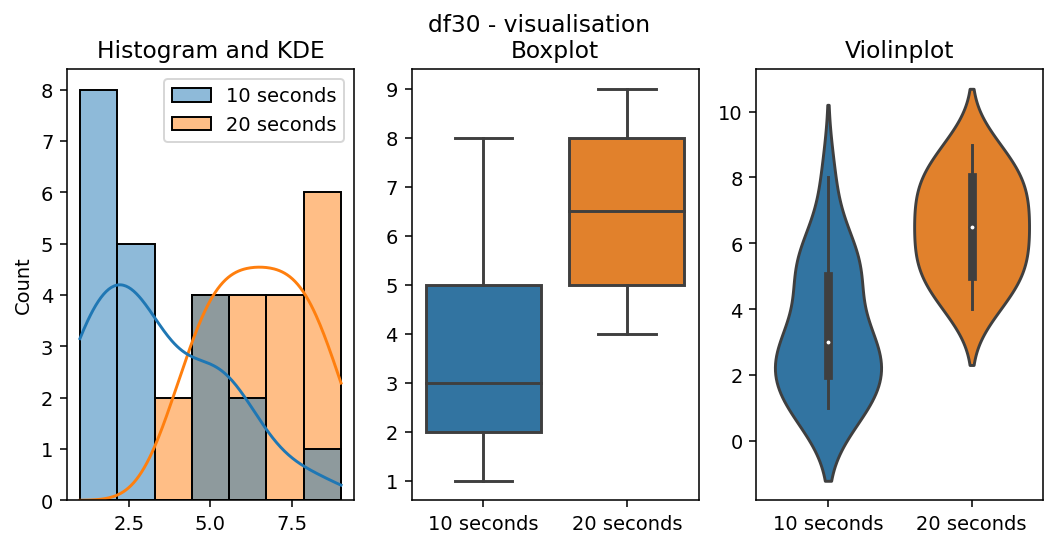

In [ ]:
plt.figure(figsize=(9, 4), dpi=140)
plt.subplot(131)
sbn.histplot(data=df30, kde=True)
plt.title('Histogram and KDE')

plt.subplot(132)
sbn.boxplot(data=df30)
plt.title('Boxplot')

plt.subplot(133)
sbn.violinplot(data=df30)
plt.title('Violinplot')

plt.suptitle('df30 - visualisation')

plt.savefig('df30.png', dpi=400)
plt.show()

It seems that the presumption is true...

#### Is longer cool down better?

In [ ]:
# formulate H_0
print(f'H_0: longer cool-down time => fewer defects, i.e. ')
print(f"H_0: mean(df30['20 seconds']) > mean(df30['10 seconds']) \n")

# Perform a t-test
stat, p_value = scp.stats.ttest_ind(df30['20 seconds'], df30['10 seconds'], equal_var=False, alternative='less')
# ‘less’: the mean of the distribution underlying the first sample is less than the mean of the distribution underlying the second sample
print(f'p_value = {p_value}')

alpha = 0.05  # significance level
if p_value < alpha:
    # we dont have enough evidence to accept H_0
    print("Reject H_0 (Have to accept H_1). Presumption seems to be false.")
else:
    # significant evidence to reject H_0, i.e. to accept H_1
    print("Can't reject H_0 (Have to accept H_0). Presumption seems to be true.")

H_0: longer cool-down time => fewer defects, i.e. 
H_0: mean(df30['20 seconds']) > mean(df30['10 seconds']) 

p_value = 0.9999986472121876
Can't reject H_0 (Have to accept H_0). Presumption seems to be true.


#### Confidence intervals

In [ ]:
# Calculate means and std-s
mean10sec = np.mean(df30['10 seconds'])
mean20sec = np.mean(df30['20 seconds'])
std10sec = np.std(df30['10 seconds'], ddof=1)
std20sec = np.std(df30['20 seconds'], ddof=1)

# get num of data
n1 = len(df30['10 seconds'])
n2 = len(df30['20 seconds'])

# std error
se = np.sqrt((std10sec**2 / n1) + (std20sec**2 / n2))

# Calculate the t-statistic for a 95% confidence interval (two-tailed)
alpha = 0.05
t_critical = scp.stats.t.ppf(1 - alpha / 2, df=(n1 + n2 - 2)) # df = degrees of freedom

# Calculate the margin of error
margin_of_error = t_critical * se

diff_of_means = np.abs(mean10sec - mean20sec) # abs() because we care about the difference (we already know, which mean is greater)

# Calculate the confidence interval
confidence_interval = (diff_of_means - margin_of_error, diff_of_means + margin_of_error)

print("95% Confidence Interval on the Difference in Means:", confidence_interval)

95% Confidence Interval on the Difference in Means: (2.0050651889219893, 4.294934811078011)


#### dot diagram

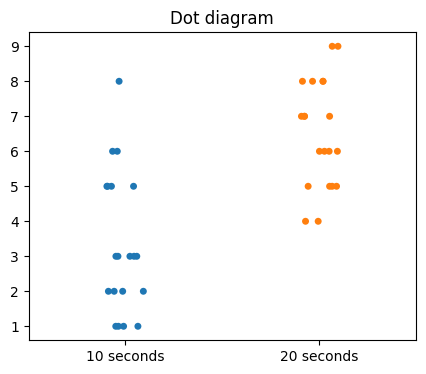

In [ ]:
plt.figure(figsize=(5, 4), dpi=100)
sbn.stripplot(data=df30, jitter=True)
plt.title('Dot diagram')

plt.savefig('df30_dots.png', dpi=400)
plt.show()

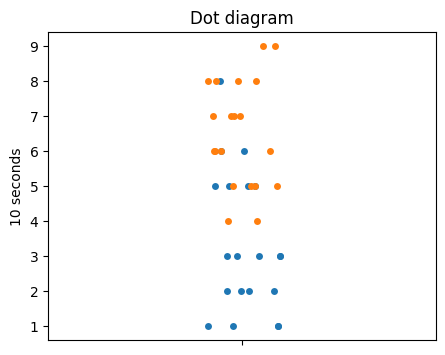

In [ ]:
plt.figure(figsize=(5, 4), dpi=100)
sbn.stripplot(data=df30['10 seconds'], jitter=True)
sbn.stripplot(data=df30['20 seconds'], jitter=True)
plt.title('Dot diagram')

plt.savefig('df30_dots2.png', dpi=400)
plt.show()